## Observations and Insights 

In [752]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets 
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
total_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
#change order of DF and use how + outer left

# Display the data table for preview
total_data.head(30)

Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0      k403     Ramicane    Male          21          16          0   
1      k403     Ramicane    Male          21          16          5   
2      k403     Ramicane    Male          21          16         10   
3      k403     Ramicane    Male          21          16         15   
4      k403     Ramicane    Male          21          16         20   
5      k403     Ramicane    Male          21          16         25   
6      k403     Ramicane    Male          21          16         30   
7      k403     Ramicane    Male          21          16         35   
8      k403     Ramicane    Male          21          16         40   
9      k403     Ramicane    Male          21          16         45   
10     s185    Capomulin  Female           3          17          0   
11     s185    Capomulin  Female           3          17          5   
12     s185    Capomulin  Female           3          17         10   
13     s185    Capomulin  Female           3          17         15   
14     s185    Capomulin  Female           3          17         20   
15     s185    Capomulin  Female           3          17         25   
16     s185    Capomulin  Female           3          17         30   
17     s185    Capomulin  Female           3          17         35   
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   
20     x401    Capomulin  Female          16          15          0   
21     x401    Capomulin  Female          16          15          5   
22     x401    Capomulin  Female          16          15         10   
23     x401    Capomulin  Female          16          15         15   
24     x401    Capomulin  Female          16          15         20   
25     x401    Capomulin  Female          16          15         25   
26     x401    Capomulin  Female          16          15         30   
27     x401    Capomulin  Female          16          15         35   
28     x401    Capomulin  Female          16          15         40   
29     x401    Capomulin  Female          16          15         45   

    Tumor Volume (mm3)  Metastatic Sites  
0            45.000000                 0  
1            38.825898                 0  
2            35.014271                 1  
3            34.223992                 1  
4            32.997729                 1  
5            33.464577                 1  
6            31.099498                 1  
7            26.546993                 1  
8            24.365505                 1  
9            22.050126                 1  
10           45.000000                 0  
11           43.878496                 0  
12           37.614948                 0  
13           38.177232                 0  
14           36.866876                 0  
15           33.949940                 0  
16           32.959671                 1  
17           28.328531                 1  
18           25.472143                 1  
19           23.343598                 1  
20           45.000000                 0  
21           45.473753                 0  
22           39.113891                 0  
23           39.776250                 0  
24           36.065835                 0  
25           36.617120                 0  
26           32.915292                 0  
27           30.206825                 0  
28           28.167397                 0  
29           28.484033                 0

In [730]:
# Checking the number of mice.

len(total_data["Mouse ID"].value_counts())
#total_data["Mouse ID"].value_counts()

249

In [731]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


total_data["Mouse ID"].value_counts()


g989    13
l700    10
t451    10
y163    10
j984    10
        ..
l872     1
u153     1
b447     1
o848     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [732]:
# Optional: Get all the data for the duplicate mouse ID. 

In [733]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = total_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='first', inplace=False, ignore_index=True)

clean_data["Mouse ID"].value_counts()


l700    10
t451    10
g791    10
y163    10
t718    10
        ..
f932     1
v199     1
x226     1
n482     1
d133     1
Name: Mouse ID, Length: 249, dtype: int64

In [734]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].value_counts())

249

## Summary Statistics

In [735]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

only_tumor_volume_1 = clean_data.loc[:,["Drug Regimen" , "Tumor Volume (mm3)"]]

group_by_drugregimen_count = only_tumor_volume_1.groupby(['Drug Regimen']).count()
group_by_drugregimen_mean = only_tumor_volume_1.groupby(['Drug Regimen']).mean()
group_by_drugregimen_median = only_tumor_volume_1.groupby(['Drug Regimen']).median()
group_by_drugregimen_variance = only_tumor_volume_1.groupby(['Drug Regimen']).var()
group_by_drugregimen_std = only_tumor_volume_1.groupby(['Drug Regimen']).std()
group_by_drugregimen_sem = only_tumor_volume_1.groupby(['Drug Regimen']).sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.

stats_summary = pd.merge(group_by_drugregimen_count,group_by_drugregimen_mean,on="Drug Regimen")
stats_summary2 = pd.merge(stats_summary,group_by_drugregimen_median,on="Drug Regimen")
stats_summary3 =  pd.merge(stats_summary2,group_by_drugregimen_variance,on="Drug Regimen")
stats_summary4 =  pd.merge(stats_summary3,group_by_drugregimen_std,on="Drug Regimen")
stats_summary_Final =  pd.merge(stats_summary4,group_by_drugregimen_sem,on="Drug Regimen")

stats_summary_Final.columns = ['Count','Mean', 'Median', 'Variance','STDEV','SEM']

stats_summary_Final.reset_index(drop=False)

#group_by_drugregimen[["Tumor Volume (mm3)"]].mean(),group_by_drugregimen[["Tumor Volume (mm3)"]].median(),
#group_by_drugregimen[["Tumor Volume (mm3)"]].var(),
#group_by_drugregimen[["Tumor Volume (mm3)"]].std()

Drug Regimen  Count       Mean     Median   Variance     STDEV       SEM
0    Capomulin    230  40.675741  41.557809  24.947764  4.994774  0.329346
1     Ceftamin    178  52.591172  51.776157  39.290177  6.268188  0.469821
2    Infubinol    178  52.884795  51.820584  43.128684  6.567243  0.492236
3     Ketapril    188  55.235638  53.698743  68.553577  8.279709  0.603860
4     Naftisol    186  54.331565  52.509285  66.173479  8.134708  0.596466
5      Placebo    181  54.033581  52.288934  61.168083  7.821003  0.581331
6     Propriva    156  52.393463  50.909965  43.138803  6.568014  0.525862
7     Ramicane    228  40.216745  40.673236  23.486704  4.846308  0.320955
8     Stelasyn    181  54.233149  52.431737  59.450562  7.710419  0.573111
9    Zoniferol    182  53.236507  51.818479  48.533355  6.966589  0.516398

In [736]:
#use the aggregate function .agg (aggregate function) and apply all the st functions 

In [737]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function

only_tumor_volume2 = clean_data.loc[:,["Drug Regimen" , "Tumor Volume (mm3)"]]

only_tumor_volume2.groupby('Drug Regimen').describe()


Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                 230.0  40.675741  4.994774  23.343598  37.685933   
Ceftamin                  178.0  52.591172  6.268188  45.000000  47.208427   
Infubinol                 178.0  52.884795  6.567243  36.321346  47.312353   
Ketapril                  188.0  55.235638  8.279709  45.000000  48.232987   
Naftisol                  186.0  54.331565  8.134708  45.000000  47.285874   
Placebo                   181.0  54.033581  7.821003  45.000000  47.459053   
Propriva                  156.0  52.393463  6.568014  45.000000  47.046068   
Ramicane                  228.0  40.216745  4.846308  22.050126  36.674635   
Stelasyn                  181.0  54.233149  7.710419  45.000000  48.047139   
Zoniferol                 182.0  53.236507  6.966589  45.000000  47.337876   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     41.557809  45.000000  48.158209  
Ceftamin      51.776157  56.801438  68.923185  
Infubinol     51.820584  57.314444  72.226731  
Ketapril      53.698743  60.870951  78.567014  
Naftisol      52.509285  59.963034  76.668817  
Placebo       52.288934  59.916934  73.212939  
Propriva      50.909965  56.491585  72.455421  
Ramicane      40.673236  45.000000  47.622816  
Stelasyn      52.431737  58.719297  75.123690  
Zoniferol     51.818479  57.954259  73.324432

## Bar and Pie Charts

No handles with labels found to put in legend.


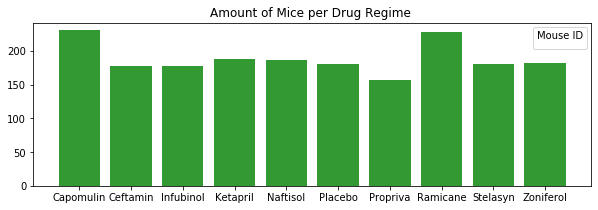

In [818]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

x_drugs = ["Capomulin","Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol" ]
y_mice = [230, 178, 178, 188, 186, 181, 156, 228, 181, 182]
tick_locations = (value for value in x_drugs)


plt.figure(figsize = (10,3))
plt.bar(x_drugs,y_mice, color = "g" , alpha = 0.8, align = "center")
plt.title("Amount of Mice per Drug Regime ")
plt.legend(title = "Mouse ID", loc=1, prop={'size' : 9})

#(loc=2, prop={'size': 6})

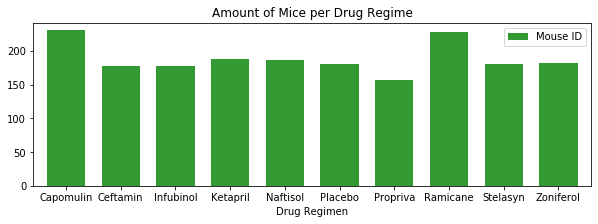

In [819]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

group_by_drugregimen[["Mouse ID"]].count().plot(kind="bar", color = "g" , alpha = 0.8, rot=0, align = "center", title = "Amount of Mice per Drug Regime", stacked=True, width=0.7,figsize = (10,3))


Text(0.5, 1.0, 'Mice Sex - Share%')

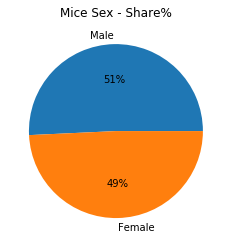

In [740]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_sex = clean_data["Sex"].value_counts()

plt.pie(mice_sex,labels = ["Male","Female"] ,autopct = "%1.0f%%")
plt.title("Mice Sex - Share%")


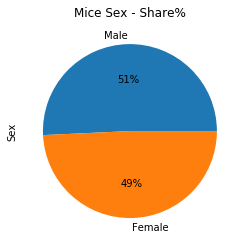

In [741]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

mice_sex.plot(kind="pie", autopct = "%1.0f%%", title="Mice Sex - Share%")


## Quartiles, Outliers and Boxplots

In [742]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# "Capomulin", "Ramicane", "Infubinol", "Ceftamin"

# Start by getting the last (greatest) timepoint for each mouse

filtered_df = clean_data.loc[:,["Mouse ID","Timepoint"]]

maxtime_each_mouse = filtered_df.groupby("Mouse ID").max()
                                                          
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
#tumor_value_highest

tumor_value_highest = pd.merge(maxtime_each_mouse,clean_data, on=("Mouse ID","Timepoint"), how="left")
tumor_value_highest2 = tumor_value_highest.set_index("Drug Regimen")

final_highest = tumor_value_highest2.loc[['Capomulin','Ramicane','Infubinol','Ceftamin'],["Mouse ID","Timepoint","Tumor Volume (mm3)"]]
final_highest = final_highest.reset_index()

In [822]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)

drug_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
tumor_list = []

for drugs in drug_treatments:
    final_tumor_volume = final_highest.loc[final_highest["Drug Regimen"]==drugs,'Tumor Volume (mm3)']
    tumor_list.append(final_tumor_volume)
    
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

outliers_df = tumor_value_highest2.loc[:,["Mouse ID",'Tumor Volume (mm3)']]

    # add subset 

outliers_Capomulin = outliers_df.loc[["Capomulin"],:]
outliers_Ramicane = outliers_df.loc[["Ramicane"],:]
outliers_Infubinol = outliers_df.loc[["Infubinol"],:]
outliers_Ceftamin = outliers_df.loc[["Ceftamin"],:]

    # Determine outliers using upper and lower bounds


quartiles_Capomulin = outliers_Capomulin.quantile([0.25,0.5,0.75])
quartiles_Ramicane = outliers_Ramicane.quantile([.25,.5,.75])
quartiles_Infubinol = outliers_Infubinol.quantile([.25,.5,.75])
quartiles_Ceftamin = outliers_Ceftamin.quantile([.25,.5,.75])



#lowerq_cap = quartiles_Capomulin[0.25]
#lowerq_ram = quartiles_Ramicane[0.25]
#lowerq_inf = quartiles_Infubinol[0.25]
#lowerq_cef = quartiles_Ceftamin[0.25]

#upperq_cap = quartiles_Capomulin[0.75]
#upperq_ram = quartiles_Ramicane[0.75]
#upperq_inf = quartiles_Infubinol[0.75]
#upperq_cef = quartiles_Ceftamin[0.75]

#qr_cap = upperq_cap-lowerq_cap
#iqr_ram = upperq_ram-lowerq_ram
#iqr_inf = upperq_inf-lowerq_inf
#iqr_cef = upperq_cef-lowerq_cef

quartiles_Capomulin



Tumor Volume (mm3)
0.25           32.377357
0.50           38.125164
0.75           40.159220

In [813]:
quartiles_Ramicane


Tumor Volume (mm3)
0.25           31.560470
0.50           36.561652
0.75           40.659006

In [745]:
quartiles_Infubinol


Tumor Volume (mm3)
0.25           54.048608
0.50           60.165180
0.75           65.525743

In [746]:
quartiles_Ceftamin

Tumor Volume (mm3)
0.25           48.722078
0.50           59.851956
0.75           64.299830

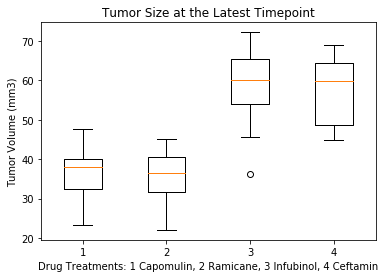

In [747]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1,ax1 = plt.subplots()
ax1.set_title('Tumor Size at the Latest Timepoint')
ax1.set_xlabel("Drug Treatments: 1 Capomulin, 2 Ramicane, 3 Infubinol, 4 Ceftamin")
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_list)


plt.show()


## Line and Scatter Plots

In [748]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

line_plot_prep = clean_data.set_index('Mouse ID')
#Mouse ID = s185
#Timepoint
#Tumor Volume (mm3)
line_plot_data = line_plot_prep.loc['s185',['Timepoint','Tumor Volume (mm3)']]

line_plot_data_final = line_plot_data.loc[:,['Timepoint','Tumor Volume (mm3)']].set_index('Timepoint')

line_plot_data_final ˜

line_plot_data_final.plot(kind="line", color = "g" , alpha = 0.8, title = "Tumor Volume by Timepoint - Capomulin - Mouse s185 ", figsize = (10,6))



SyntaxError: invalid character in identifier (<ipython-input-748-e41575628be6>, line 11)

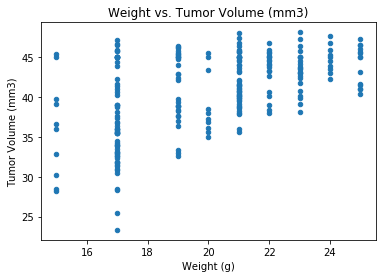

In [749]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

scatter_plot_prep = clean_data.set_index('Drug Regimen')

#scatter_plot_prep

scatter_plot_data = scatter_plot_prep.loc[['Capomulin'],['Weight (g)','Tumor Volume (mm3)']]

scatter_plot_data_final = scatter_plot_data.loc[:,['Tumor Volume (mm3)','Weight (g)']]


ax2 = scatter_plot_data_final.plot.scatter(x='Weight (g)',
                      y='Tumor Volume (mm3)',title = 'Weight vs. Tumor Volume (mm3)')



## Correlation and Regression

In [750]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


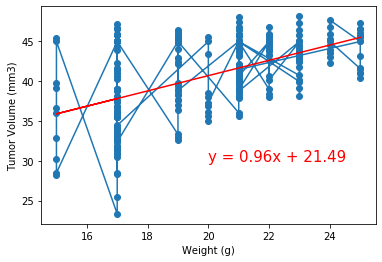

In [787]:
x_values = scatter_plot_data_final['Weight (g)']
y_values = scatter_plot_data_final['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()